### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the Data

In [3]:
df = pd.read_excel(r'C:\Users\srava\Downloads\1122999-drive-download-20210420T084107Z-001\Diamonds.xlsx', sheet_name='Diamond')

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53943,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53944,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53945,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53946,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
#df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [6]:
#df1 = pd.read_csv(r'‪C:\Users\srava\Downloads\diamonds.csv')

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53948, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53948 entries, 0 to 53947
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53947 non-null  float64
 1   cut      53947 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53946 non-null  object 
 4   depth    53903 non-null  float64
 5   table    53946 non-null  float64
 6   price    53946 non-null  object 
 7   x        53946 non-null  float64
 8   y        53946 non-null  float64
 9   z        53941 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


### Missing Values

In [10]:
df.isna().sum()

carat       1
cut         1
color       8
clarity     2
depth      45
table       2
price       2
x           2
y           2
z           7
dtype: int64

In [11]:
# missing value in carat
df[df.carat.isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
53885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# we can drop this entire row

#df = df.dropna(axis=0, how='all')

df.dropna(axis=0, how='all', inplace=True)

In [13]:
df.isna().sum()

carat       0
cut         0
color       7
clarity     1
depth      44
table       1
price       1
x           1
y           1
z           6
dtype: int64

In [14]:
# missing values in color
df[df.color.isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
19,0.30,Very Good,NaN,SI1,62.7,59.0,351,4.21,4.27,2.66
18109,1.56,Premium,NaN,VS2,60.8,59.0,7326,7.56,7.51,4.58
43474,0.50,Good,NaN,VS2,63.1,61.0,1419,5.00,5.05,3.17
53895,0.71,Ideal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53920,0.76,Ideal,NaN,VVS1,62.2,55.0,2753,5.89,5.87,3.66
53927,0.71,Ideal,NaN,SI1,61.9,56.0,2756,5.71,5.73,3.54
53941,0.70,Very Good,NaN,VS2,61.2,59.0,2757,5.69,5.72,3.49


In [15]:
df.color.mode()

0    G
dtype: object

In [16]:
df.color.fillna(df.color.mode()[0],inplace=True) 

In [17]:
df.isna().sum()

carat       0
cut         0
color       0
clarity     1
depth      44
table       1
price       1
x           1
y           1
z           6
dtype: int64

In [18]:
# missing values in clarity

df[df.clarity.isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
53895,0.71,Ideal,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df[df.clarity.isnull()].index

Int64Index([53895], dtype='int64')

In [20]:
df.drop(axis=0, index=df[df.clarity.isnull()].index, inplace=True)

In [21]:
df.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth      43
table       0
price       0
x           0
y           0
z           5
dtype: int64

In [22]:
df[df.depth.isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
20,0.30,Good,I,SI2,NaN,56.0,351,4.26,4.30,2.71
21,0.23,Very Good,E,VS2,NaN,55.0,352,3.85,3.92,2.48
26,0.24,Premium,I,VS1,NaN,57.0,355,3.97,3.94,2.47
27,0.30,Very Good,J,VS2,NaN,57.0,357,4.28,4.30,2.67
45,0.29,Premium,F,SI1,NaN,58.0,403,4.24,4.26,2.65
46,0.32,Very Good,H,SI2,NaN,55.0,403,4.35,4.42,2.71
47,0.32,Good,H,SI2,NaN,56.0,403,4.36,4.38,2.79
48,0.25,Very Good,E,VS2,NaN,60.0,404,4.00,4.03,2.54
49,0.29,Very Good,H,SI2,NaN,60.0,404,4.33,4.37,2.64
50,0.24,Very Good,F,SI1,NaN,61.0,404,4.02,4.03,2.45


In [23]:
df.depth.fillna((2*df.z)/(df.x+df.y), inplace=True)

In [24]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          5
dtype: int64

In [25]:
df[df.z.isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
8162,0.70,Very Good,D,VVS1,63.4,59.0,4362,5.63,5.64,NaN
10104,0.73,Very Good,D,VVS1,61.8,61.0,4716,5.70,5.73,NaN
11054,0.28,Very Good,D,VVS1,60.3,62.0,596,4.22,4.24,NaN
23758,1.06,Very Good,D,VVS1,61.8,57.0,11815,6.49,6.52,NaN
23839,1.01,Very Good,D,VVS1,63.9,56.0,11923,6.32,6.36,NaN


In [26]:
df.z.mean()

3.538740290317375

In [27]:
df.z.fillna(np.mean(df.z), inplace=True) #filling the missing values with mean

In [28]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##### Drop the Duplicates

In [29]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
53943,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53944,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53945,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53946,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [32]:
def check_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

In [33]:
# use apply() to apply a function on each value of the column

df.price.apply(check_int)

0        True
1        True
2        True
3        True
4        True
         ... 
53937    True
53938    True
53939    True
53940    True
53941    True
Name: price, Length: 53794, dtype: bool

In [34]:
df.price.apply(check_int).value_counts()

True     53789
False        5
Name: price, dtype: int64

In [35]:
df[~df.price.apply(check_int)]
df[~df.price.apply(check_int)].index

,carat,cut,color,clarity,depth,table,price,x,y,z
32,0.23,Very Good,E,VS1,60.7,59.0,? ...,3.97,4.01,2.42
80,0.26,Very Good,E,VVS1,63.4,59.0,?,4.00,4.04,2.55
23161,1.54,Premium,H,VS2,61.0,60.0,?,7.46,7.42,4.54
33067,0.32,Ideal,H,IF,61.6,55.0,?,4.41,4.42,2.72
50172,0.50,Very Good,F,IF,59.7,60.0,?,5.18,5.24,3.11


Int64Index([32, 80, 23161, 33067, 50172], dtype='int64')

In [36]:
df.iloc[df[~df.price.apply(check_int)].index]

# since we dropped few rows in the previous steps, the index numbers missed the sequence, we have to reset the index

,carat,cut,color,clarity,depth,table,price,x,y,z
32,0.23,Very Good,E,VS1,60.7,59.0,? ...,3.97,4.01,2.42
80,0.26,Very Good,E,VVS1,63.4,59.0,?,4.00,4.04,2.55
23213,1.61,Ideal,E,SI2,61.3,59.0,11220,7.47,7.57,4.61
33158,0.31,Ideal,H,IF,62.1,54.0,816,4.33,4.37,2.70
50317,0.71,Very Good,G,SI1,63.1,60.0,2240,5.60,5.69,3.56


In [37]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            53932, 53933, 53934, 53935, 53936, 53937, 53938, 53939, 53940,
            53941],
           dtype='int64', length=53794)

In [38]:
df.reset_index(inplace=True)

In [39]:
df.index

RangeIndex(start=0, stop=53794, step=1)

In [40]:
df.iloc[df[~df.price.apply(check_int)].index]['price']

32       ?                                             ...
80                                                       ?
23109                                                    ?
32976                                                    ?
50027                                                    ?
Name: price, dtype: object

In [41]:
# remove the additional spaces in record #32
df.price.astype(str).apply(str.strip).iloc[df[~df.price.apply(check_int)].index]

32       ?
80       ?
23109    ?
32976    ?
50027    ?
Name: price, dtype: object

In [42]:
# mean of the values except '?' rows
df[df.price.apply(check_int)]['price'].astype(int).mean()

3933.148840841064

In [43]:
df.price = df.price.astype(str).apply(str.strip).replace('?', 3933)

In [44]:
df[~df.price.apply(check_int)]

,index,carat,cut,color,clarity,depth,table,price,x,y,z


In [45]:
df.price = df.price.astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53794 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53794 non-null  float64
 6   table    53794 non-null  float64
 7   price    53794 non-null  int32  
 8   x        53794 non-null  float64
 9   y        53794 non-null  float64
 10  z        53794 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(3)
memory usage: 4.3+ MB


In [47]:
df.drop('index',axis = 1,inplace = True)

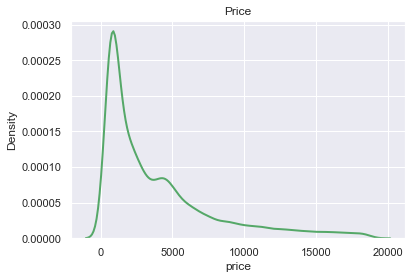

In [48]:
#sns.kdeplot(df.price);
plt.title('Price')
sns.kdeplot(x='price',data=df,color='g',linewidth=2);
plt.show();

In [49]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
df.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


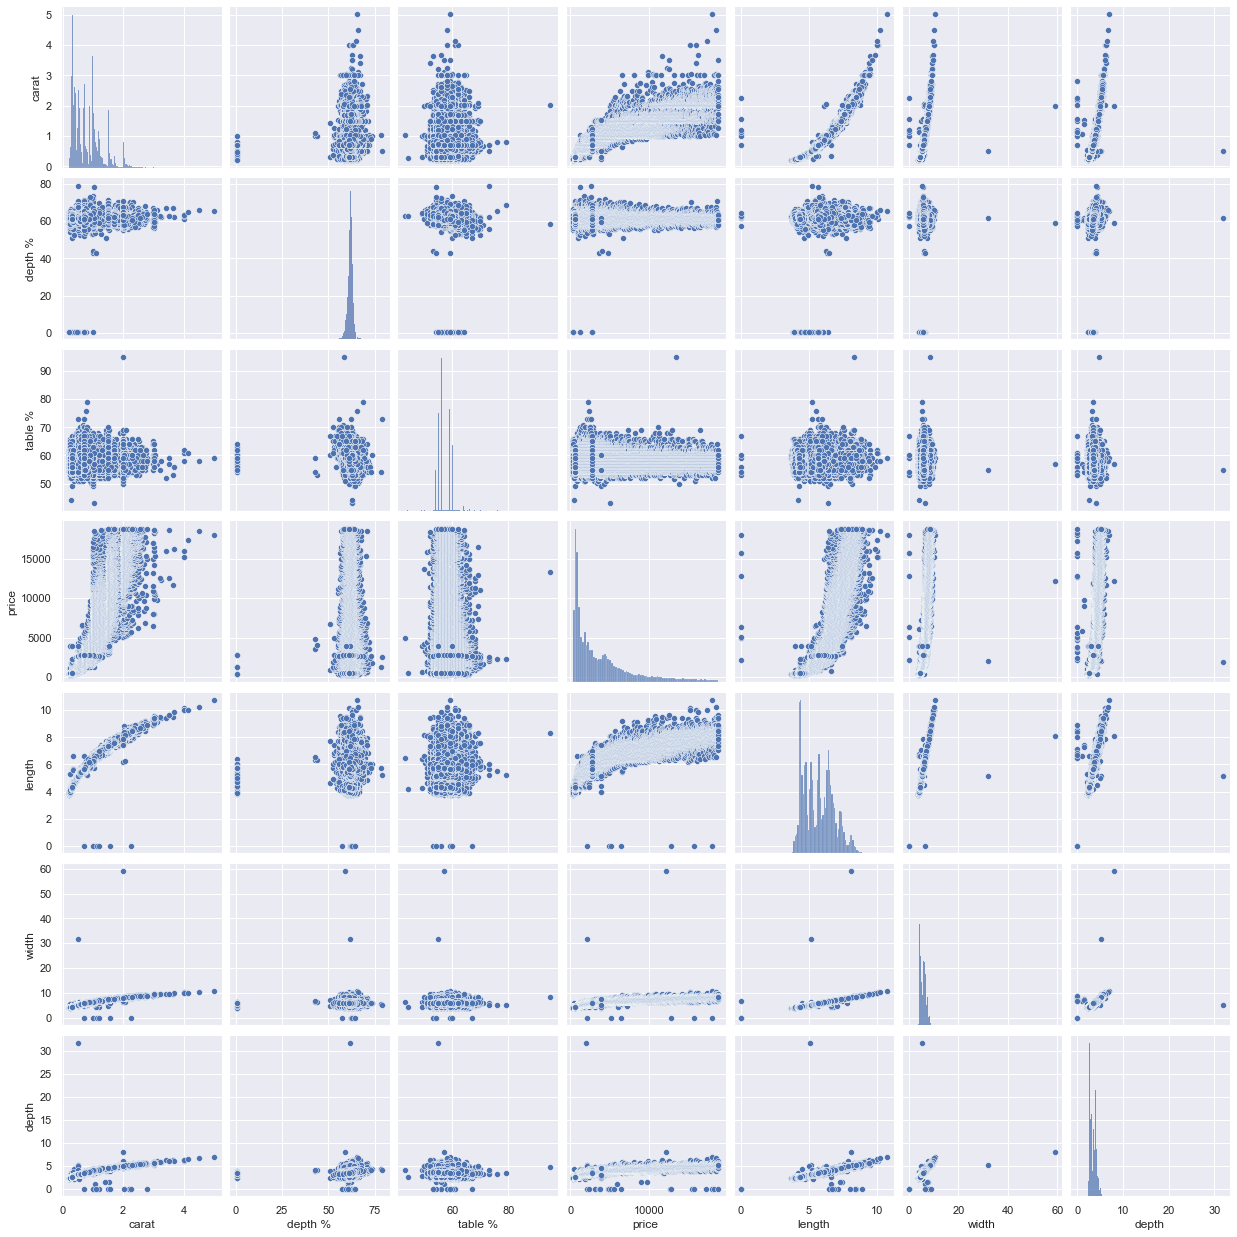

In [50]:
sns.pairplot(df);

#### Observation:   
        we can notice that price is dependant on length, width and depth and carrat and also few outliers present in it
                    

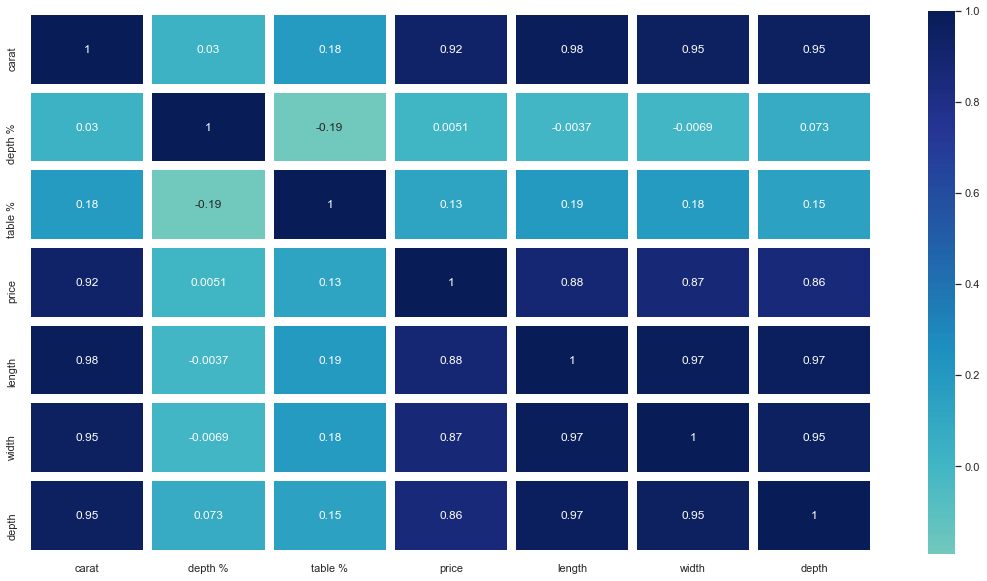

In [51]:
#To find the correlation of all features
plt.subplots(figsize=(19, 10))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0, cmap="YlGnBu");

### Observation:

   we can obserb that correlation values of carat, length, width, and depth are high

### Color vs Price

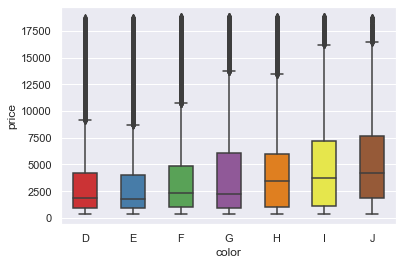

In [52]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.5,order = ['D','E','F','G','H','I','J'] );

### Observation

   * I and J color has highest prices of all remaining colors
   * G, H, I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color.

### Cut vs Price

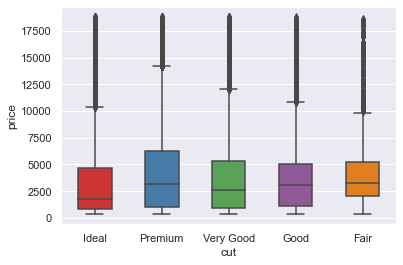

In [53]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] );

### Observation: 
   * Premium cut has highest price of all
   * Fair..is the lower the quality of cut, the higher the number of outliers except for the Ideal cut type.

### Clarity vs Price

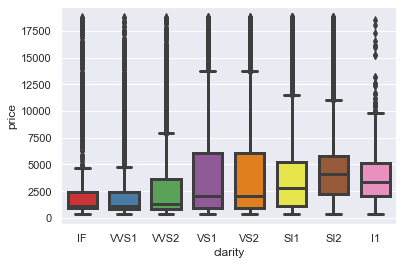

In [54]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']);

### Observation:
   * Diamonds with clarity VS1 and VS2 has more prices.
   * IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.

### Lable encoding

In [55]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'cut'. 
df['cut']= label_encoder.fit_transform(df['cut']) 

# Encode labels in column 'cut'. 
df['color']= label_encoder.fit_transform(df['color']) 

# Encode labels in column 'cut'. 
df['clarity']= label_encoder.fit_transform(df['clarity']) 



df.head()

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


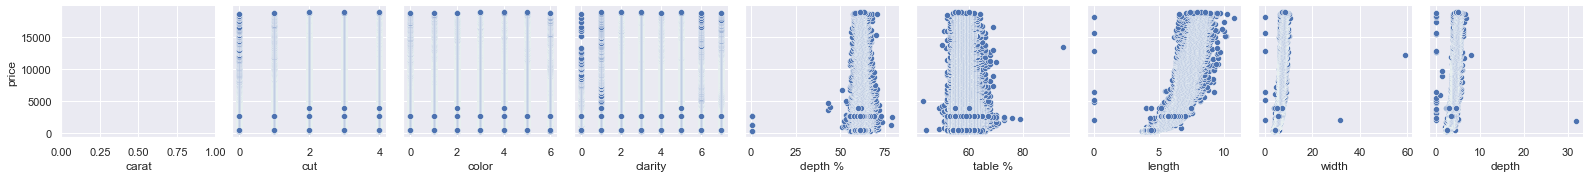

In [56]:
sns.pairplot(data = df,
            x_vars = ['carat','cut','color','clarity','depth %','table %','length','width','depth'],
            y_vars = 'price');

## Data Normalization with sklearn

In [57]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'price',
       'length', 'width', 'depth'],
      dtype='object')

In [58]:
X_data = df[['carat','cut','color','depth %', 'table %', 'price',
       'length', 'width', 'depth']]

In [59]:
Y_data = df[['price']]

### Method - 1

In [60]:
#X_data = X_data.apply(lambda x: (x- x.min(axis = 0)) / (x.max(axis = 0)) - x.min(axis = 0))

In [61]:
#X_data.head()

In [60]:
#Y_data = Y_data.apply(lambda x: (x- x.min(axis = 0)) / (x.max(axis = 0)) - x.min(axis = 0))

In [61]:
#Y_data.head(2)

### Method - 2

In [61]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X_data)
New_dataX = scalar.transform(X_data)

MinMaxScaler()

In [62]:
New_dataX

array([[0.00623701, 0.5       , 0.16666667, ..., 0.36778399, 0.06757216,
        0.07641509],
       [0.002079  , 0.75      , 0.16666667, ..., 0.36219739, 0.06519525,
        0.07264151],
       [0.00623701, 0.25      , 0.16666667, ..., 0.37709497, 0.06910017,
        0.07264151],
       ...,
       [0.13721414, 0.75      , 0.66666667, ..., 0.5726257 , 0.10390492,
        0.11761006],
       [0.11434511, 0.5       , 0.        , ..., 0.54283054, 0.09966044,
        0.11446541],
       [0.1039501 , 1.        , 0.5       , ..., 0.52979516, 0.09711375,
        0.10974843]])

In [63]:
New_dataX = pd.DataFrame(New_dataX)

In [64]:
New_dataX

,0,1,2,3,4,5,6,7,8
0,0.006237,0.50,0.166667,0.776856,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,0.75,0.166667,0.755180,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,0.25,0.166667,0.718202,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,0.75,0.833333,0.788332,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,0.25,1.000000,0.799808,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...
53789,0.108108,0.25,0.000000,0.797258,0.230769,0.131427,0.529795,0.097623,0.113522
53790,0.103950,1.00,0.000000,0.793433,0.326923,0.131427,0.527002,0.096435,0.111950
53791,0.137214,0.75,0.666667,0.770481,0.288462,0.131427,0.572626,0.103905,0.117610
53792,0.114345,0.50,0.000000,0.785782,0.230769,0.131427,0.542831,0.099660,0.114465


### Train Test Split

In [65]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

Y_test = Y_data
X_test = New_dataX

X_train, X_test, y_train, y_test = train_test_split(X_test,Y_test,test_size=0.25,random_state=0)

In [66]:
y_train=np.array(y_train)
type(y_train)

numpy.ndarray

In [67]:
len(X_test)
len(X_train)
len(y_test)
len(y_train)

13449

40345

13449

40345

In [68]:
X_test

,0,1,2,3,4,5,6,7,8
28227,0.008316,0.50,0.833333,0.787057,0.269231,0.005731,0.370577,0.067063,0.077673
17317,0.168399,0.50,0.500000,0.790883,0.250000,0.358869,0.596834,0.109338,0.126415
48740,0.110187,0.75,1.000000,0.760280,0.288462,0.092501,0.546555,0.098812,0.110692
19859,0.176715,0.50,0.000000,0.770481,0.250000,0.439260,0.608939,0.112224,0.126101
44240,0.066528,1.00,0.500000,0.780682,0.288462,0.067849,0.483240,0.087606,0.100629
...,...,...,...,...,...,...,...,...,...
23293,0.020790,0.50,0.500000,0.781957,0.269231,0.005190,0.398510,0.073175,0.083648
25693,0.274428,0.50,0.500000,0.775581,0.250000,0.776666,0.688082,0.126825,0.143396
9426,0.170478,1.00,0.333333,0.795983,0.288462,0.230740,0.592179,0.108659,0.126415
13458,0.199584,1.00,0.666667,0.795983,0.269231,0.281721,0.618250,0.113073,0.131761


### KNN and Predictions on Test Data

In [69]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#from scratch
distance = np.zeros(y_test.shape)
y_pred = np.zeros(y_test.shape)
k = 3
for i in range(len(X_test)):
    distance = np.sqrt(((X_test[i]-X_train)**2).sum(axis = 1))
    sort_value = (np.argsort(distance))
    sort_value = sort_value[:k]
    y_pred[i] = y_train[sort_value].mean()
print(y_pred)

[[ 456.33333333]
 [6870.33333333]
 [2058.33333333]
 ...
 [4689.33333333]
 [5548.        ]
 [1391.33333333]]


In [70]:
act_pred = ({'Actual': y_test, 'Predicted': y_pred})
act_pred

{'Actual': array([[ 432],
        [6964],
        [2037],
        ...,
        [4594],
        [5537],
        [1314]]),
 'Predicted': array([[ 456.33333333],
        [6870.33333333],
        [2058.33333333],
        ...,
        [4689.33333333],
        [5548.        ],
        [1391.33333333]])}

In [71]:
print('Mean Squared Error: ', (np.square(y_test - y_pred)).mean())
print('Mean Absolute Error: ', np.sqrt(np.square(y_test - y_pred)).mean())
print('Root Mean Squared Error: ', np.sqrt(((y_test - y_pred)**2).mean()))

Mean Squared Error:  24175.43442304674
Mean Absolute Error:  90.51086821820707
Root Mean Squared Error:  155.48451505872455


In [73]:
#correlation = np.corrcoef(y_test, y_pred)[0,1]
#print('R-squared: ',(correlation**2)*100)

### Scratch Evaluation

In [ ]:
Mean Squared Error:  24175.43442304674
Mean Absolute Error:  90.51086821820707
Root Mean Squared Error:  155.48451505872455